In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import sys 
sys.path.append(r'C:\Users\HP\projects\pynterpret\pynterpret')

from exploratory import corrplot, fit_scipy_distributions
from get_data import Anomalies

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
import matplotlib as mpl
mpl.use('pgf')

def figsize(scale, square=False):
    fig_width_pt = 401.18405                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    if square: 
        fig_height=fig_width
    else: 
        golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
        fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

In [6]:
anom = Anomalies()

# Correlation matrices

In [30]:
sorted_list = anom.meta.sort_values(['class','class2']).sc.tolist()
corr = anom.data.drop(["DTID", "FTID", "date", 'r'], axis=1).corr()
corr = corr.reindex(sorted_list)
corr = corr[sorted_list]
corr.to_pickle('data/02_anomalies_correlation/anomalies_correlation.pkl')

In [117]:
classification1 = {k: [anom.name_to_sc.get(e) for e in v] for k, v in anom.classification1.items()}

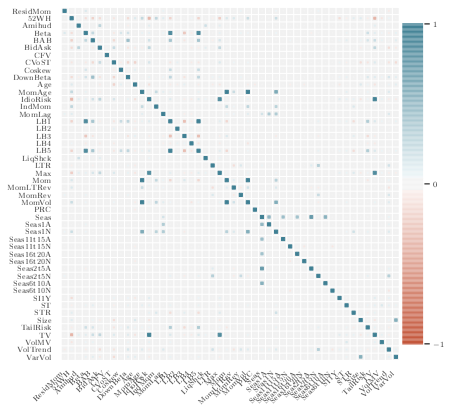

In [127]:
# plot for frictions
corr_frictions = corr[classification1['frictions']]
corr_frictions = corr_frictions.loc[classification1['frictions']]

corrplot(corr_frictions, size_scale=10, legend=True)
fig = plt.gcf()
fig.set_size_inches(figsize(1,square=True))
fig.savefig('latex/Figures/corrplot_frictions.pdf', bbox_inches='tight')

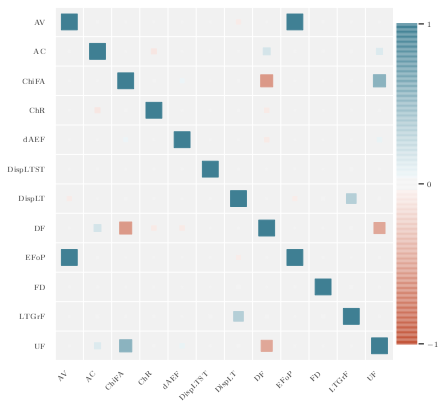

In [132]:
# plot for ibes
corr_ibes = corr[classification1['ibes']]
corr_ibes = corr_ibes.loc[classification1['ibes']]

corrplot(corr_ibes, size_scale=250, legend=True)
fig = plt.gcf()
fig.set_size_inches(figsize(1, square=True))
fig.savefig('latex/Figures/corrplot_ibes.pdf', bbox_inches='tight')

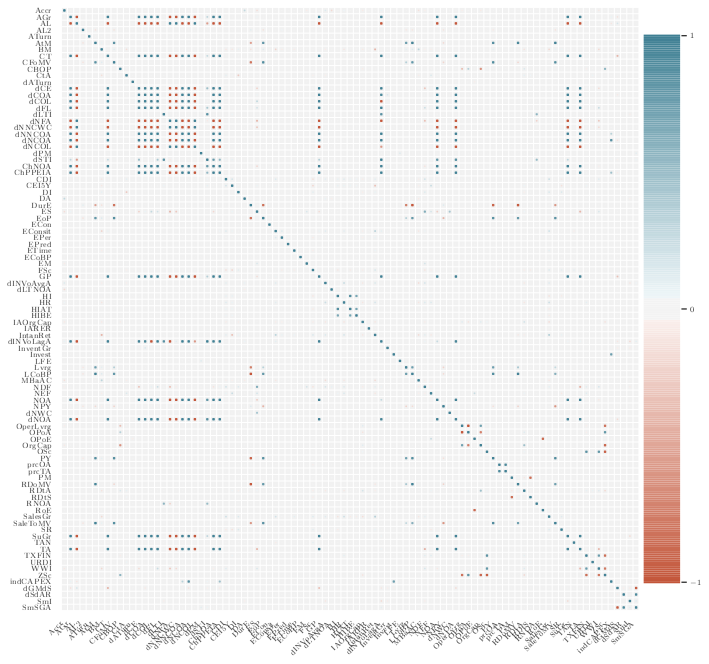

In [148]:
corr_funds= corr[classification1['fund']]
corr_funds = corr_funds.loc[classification1['fund']]

corrplot(corr_funds, size_scale=2, legend=True)
fig = plt.gcf()
fig.set_size_inches(figsize(2,square=True))
fig.savefig('latex/Figures/corrplot_funds.pdf', bbox_inches='tight')

# Returns

In [22]:
# zscore more than 8 is considere outlier
r_without_outliers = anom.data.r[np.abs((anom.data['r'] - anom.data['r'].mean())/anom.data['r'].std(ddof=0)<8)]

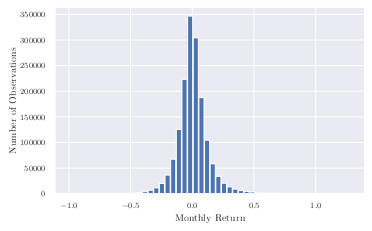

In [178]:
from scipy import stats
r_without_outliers.plot.hist(grid=True, bins=100, rwidth=0.9)
plt.xlabel('Monthly Return')
plt.ylabel('Number of Observations')
fig = plt.gcf()
fig.set_size_inches(figsize(1))
fig.savefig('latex/Figures/hist_returns.pdf', bbox_inches='tight')

In [23]:
r_without_outliers

0         -0.046680
1          0.020102
2          0.021462
3         -0.008540
4          0.112480
             ...   
1607112   -0.088914
1607113   -0.015377
1607114   -0.111549
1607115   -0.028730
1607116   -0.055098
Name: r, Length: 1605568, dtype: float64

In [31]:
average_returns

DTID
130280    0.000740
130497    0.002900
130560    0.037848
130578    0.029837
130612    0.023156
            ...   
999620    0.007199
999672    0.011699
999673    0.012711
999709    0.004811
999776    0.007075
Name: r, Length: 8350, dtype: float64

In [47]:
average_returns = pd.DataFrame(anom.data.groupby('DTID').r.mean()).reset_index()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


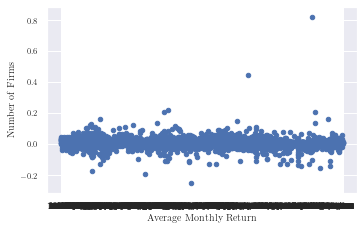

In [49]:
average_returns.plot(kind='scatter',x='DTID',y='r')
plt.xlabel('Average Monthly Return')
plt.ylabel('Number of Firms')
fig = plt.gcf()
fig.set_size_inches(figsize(1))
#fig.savefig('latex/Figures/hist_returns.pdf', bbox_inches='tight')

[autoreload of exploratory failed: Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\envs\thesis\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\HP\Anaconda3\envs\thesis\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\HP\Anaconda3\Lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\HP\Anaconda3\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\HP\projects\pynterpret\pynterpret\exploratory.py", line 10, in <module>
    from tqdm import tqdm
ModuleNotFoundError: No module named 'tqdm'
]


NameError: name 'tqdm' is not defined

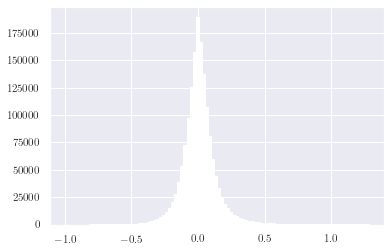

In [181]:
sses, best_name, best_params = fit_scipy_distributions(r_without_outliers, bins = 100)